# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
websites.head()

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0          None           None   
1          Apache/2.4.10         15087.0          None           None   
2  Microsoft-HTTPAPI/2.0           324.0          None           None   
3                  nginx           162.0            US             AK   
4                   None        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
0  10/10/2015 18:21               None  ...                     0           2   
1              None               None  ...                     7           4   
2              None               None  ...                     0           0   
3    7/10/1997 4:00    12/09/2013 0:45  ...                    22           3   
4   12/05/1996 0:00    11/04/2017 0:00  ...                     2           5   

   APP_BYTES  SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  \
0        700                   9                  10              1153   
1       1230                  17                  19              1265   
2          0                   0                   0                 0   
3       3812                  39                  37             18784   
4       4278                  61                  62            129889   

   REMOTE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  
0               832            9              2.0     1  
1              1230           17              0.0     0  
2                 0            0              0.0     0  
3              4380           39              8.0     0  
4              4586           61              4.0     0  

[5 rows x 21 columns]

In [4]:
websites.shape

(1781, 21)

In [5]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [49]:
# Your comment here
websites.Type.value_counts()

0    1565
1     216
Name: Type, dtype: int64

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

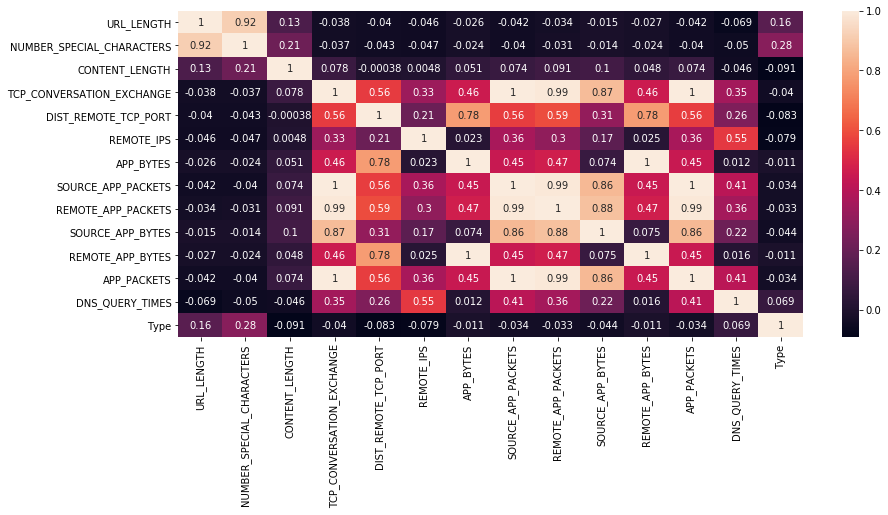

In [7]:
# Your code here
import seaborn as sn
import matplotlib.pyplot as plt

mc = websites.corr()

plt.figure(figsize=(14,6))
sn.heatmap(mc,annot=True)

In [8]:
# Your comment here

### High correlated variables:
    ### - REMOTE_APP_PACKETS & APP_PACKETS
    ### - REMOTE_APP_PACKETS & SOURCE_APP_PACKETS
    ### - REMOTE_APP_PACKETS & TCP_CONVERSATION_EXCHANGE
    ### - REMOTE_APP_BYTES & APP_BYTES
    ### - SOURCE_APP_PACKETS & APP_PACKETS
    ### - APP PACKETS & TOP_CONVERSATION_EXCHANGE
    
### REMOVE: REMOTE_APP_PACKETS, SOURCE_APP_PACKETS, REMOTE_APP_BYTES

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

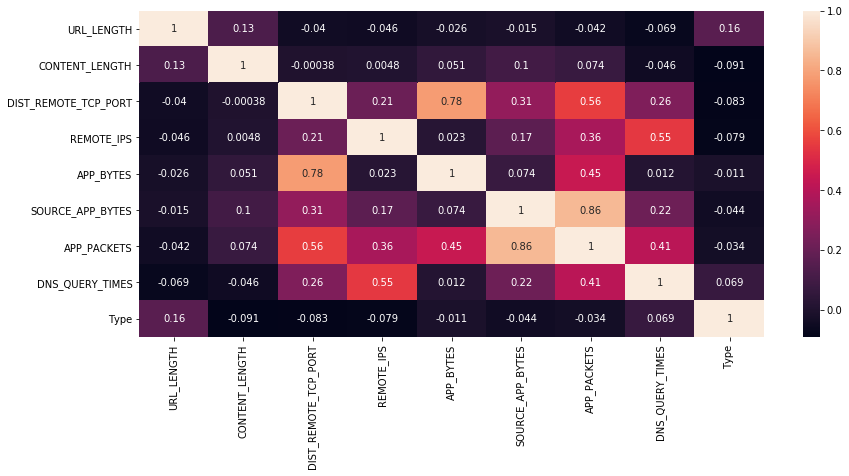

In [9]:
# Your code here
col=["REMOTE_APP_PACKETS","SOURCE_APP_PACKETS","REMOTE_APP_BYTES","TCP_CONVERSATION_EXCHANGE","NUMBER_SPECIAL_CHARACTERS"]
web = websites.drop(columns=col)
mc_web = web.corr()
plt.figure(figsize=(14,6))
sn.heatmap(mc_web,annot=True)

In [10]:
# Your comment here

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [11]:
# Your code here
web.isna().sum()

URL                       0
URL_LENGTH                0
CHARSET                   0
SERVER                    1
CONTENT_LENGTH          812
WHOIS_COUNTRY             0
WHOIS_STATEPRO            0
WHOIS_REGDATE             0
WHOIS_UPDATED_DATE        0
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
SOURCE_APP_BYTES          0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

In [12]:
np.where(web.WHOIS_COUNTRY == "None",None,web.WHOIS_COUNTRY)

array([None, None, None, ..., 'US', 'US', 'US'], dtype=object)

In [13]:
web.WHOIS_COUNTRY = np.where(web.WHOIS_COUNTRY == "None",None,web.WHOIS_COUNTRY)

In [14]:
web.WHOIS_COUNTRY.isnull().sum()

306

In [15]:
web.head()

URL  URL_LENGTH     CHARSET                 SERVER  CONTENT_LENGTH  \
0   M0_109          16  iso-8859-1                  nginx           263.0   
1  B0_2314          16       UTF-8          Apache/2.4.10         15087.0   
2   B0_911          16    us-ascii  Microsoft-HTTPAPI/2.0           324.0   
3   B0_113          17  ISO-8859-1                  nginx           162.0   
4   B0_403          17       UTF-8                   None        124140.0   

  WHOIS_COUNTRY WHOIS_STATEPRO     WHOIS_REGDATE WHOIS_UPDATED_DATE  \
0          None           None  10/10/2015 18:21               None   
1          None           None              None               None   
2          None           None              None               None   
3            US             AK    7/10/1997 4:00    12/09/2013 0:45   
4            US             TX   12/05/1996 0:00    11/04/2017 0:00   

   DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_BYTES  APP_PACKETS  \
0                     0           2        700              1153            9   
1                     7           4       1230              1265           17   
2                     0           0          0                 0            0   
3                    22           3       3812             18784           39   
4                     2           5       4278            129889           61   

   DNS_QUERY_TIMES  Type  
0              2.0     1  
1              0.0     0  
2              0.0     0  
3              8.0     0  
4              4.0     0

In [16]:
web.SOURCE_APP_BYTES.value_counts()

0        590
124       43
244       31
186       29
306       24
        ... 
1162       1
42120      1
7303       1
30035      1
2045       1
Name: SOURCE_APP_BYTES, Length: 885, dtype: int64

In [17]:
lst_none = ['SERVER','WHOIS_STATEPRO','WHOIS_REGDATE','WHOIS_UPDATED_DATE','CHARSET']
for i in lst_none:
    web[i] = np.where(web[i] == "None",None,web[i])

In [18]:
web.head()

URL  URL_LENGTH     CHARSET                 SERVER  CONTENT_LENGTH  \
0   M0_109          16  iso-8859-1                  nginx           263.0   
1  B0_2314          16       UTF-8          Apache/2.4.10         15087.0   
2   B0_911          16    us-ascii  Microsoft-HTTPAPI/2.0           324.0   
3   B0_113          17  ISO-8859-1                  nginx           162.0   
4   B0_403          17       UTF-8                   None        124140.0   

  WHOIS_COUNTRY WHOIS_STATEPRO     WHOIS_REGDATE WHOIS_UPDATED_DATE  \
0          None           None  10/10/2015 18:21               None   
1          None           None              None               None   
2          None           None              None               None   
3            US             AK    7/10/1997 4:00    12/09/2013 0:45   
4            US             TX   12/05/1996 0:00    11/04/2017 0:00   

   DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_BYTES  APP_PACKETS  \
0                     0           2        700              1153            9   
1                     7           4       1230              1265           17   
2                     0           0          0                 0            0   
3                    22           3       3812             18784           39   
4                     2           5       4278            129889           61   

   DNS_QUERY_TIMES  Type  
0              2.0     1  
1              0.0     0  
2              0.0     0  
3              8.0     0  
4              4.0     0

In [19]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1781 non-null   object 
 1   URL_LENGTH            1781 non-null   int64  
 2   CHARSET               1774 non-null   object 
 3   SERVER                1605 non-null   object 
 4   CONTENT_LENGTH        969 non-null    float64
 5   WHOIS_COUNTRY         1475 non-null   object 
 6   WHOIS_STATEPRO        1419 non-null   object 
 7   WHOIS_REGDATE         1654 non-null   object 
 8   WHOIS_UPDATED_DATE    1642 non-null   object 
 9   DIST_REMOTE_TCP_PORT  1781 non-null   int64  
 10  REMOTE_IPS            1781 non-null   int64  
 11  APP_BYTES             1781 non-null   int64  
 12  SOURCE_APP_BYTES      1781 non-null   int64  
 13  APP_PACKETS           1781 non-null   int64  
 14  DNS_QUERY_TIMES       1780 non-null   float64
 15  Type                 

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [20]:
# Your code here
null = (1781-969)/1781
null

0.45592363840539024

In [21]:
# Your comment here

### Parece que el content_length puede ser determinante para categorizar si es una URL maliciosa
### por eso no me gustarÃ­a eliminarlo.Se pueden generar 2 datasets: web_cont - dropnas y web - drop col content.

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [22]:
# Examine missing values in each column

web_cont = web.dropna()

web = web.drop("CONTENT_LENGTH",axis=1).dropna()

In [23]:
print(web_cont.shape,web.shape)

(636, 16) (1257, 15)


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [24]:
# Your code here
web.WHOIS_COUNTRY.unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', "[u'GB'; u'UK']",
       'NL', 'UG', 'JP', 'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH',
       'LV', 'TR', 'ES', 'us', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE',
       'SE', 'IT', 'NO', 'BE', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [25]:
web.WHOIS_COUNTRY = np.where(web.WHOIS_COUNTRY=="[u'GB'; u'UK']","GB",web.WHOIS_COUNTRY)

web.WHOIS_COUNTRY.unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', 'NL', 'UG', 'JP',
       'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH', 'LV', 'TR', 'ES',
       'us', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE', 'SE', 'IT', 'NO',
       'BE', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [26]:
# Your code here
web.WHOIS_COUNTRY.value_counts().index

Index(['US', 'CA', 'ES', 'AU', 'PA', 'GB', 'JP', 'IN', 'CZ', 'CN', 'CH', 'NL',
       'ru', 'BS', 'AT', 'UK', 'SC', 'PH', 'KY', 'us', 'RU', 'UA', 'KG', 'UY',
       'SI', 'HK', 'UG', 'NO', 'LV', 'TR', 'IE', 'BY', 'IL', 'PK', 'SE', 'IT',
       'AE', 'DE', 'BE'],
      dtype='object')

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [27]:
# Your code here
not_top10 = ['NL', 'CH','AT', 'UK', 'BS', 'ru', 'us', 'PH', 'SC', 'KY', 'KG', 'UA', 'RU', 'UY',
         'HK', 'SI', 'AE', 'BY', 'NO', 'IL', 'IT', 'TR', 'IE', 'BE', 'PK', 'UG',
         'LV', 'SE', 'DE']
    
for i in not_top10:
    web.WHOIS_COUNTRY = np.where(web.WHOIS_COUNTRY == i,"OTHER",web.WHOIS_COUNTRY)

In [28]:
web.WHOIS_COUNTRY.value_counts()

US       957
CA        75
ES        63
OTHER     63
AU        26
PA        21
GB        18
JP        10
IN         8
CN         8
CZ         8
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [29]:
# Your code here
col = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
web.drop(col,inplace=True,axis=1)

In [30]:
web.head()

URL  URL_LENGTH     CHARSET                 SERVER WHOIS_COUNTRY  \
3    B0_113          17  ISO-8859-1                  nginx            US   
5   B0_2064          18       UTF-8                  nginx         OTHER   
6    B0_462          18  iso-8859-1               Apache/2            US   
7   B0_1128          19    us-ascii  Microsoft-HTTPAPI/2.0            US   
10  B0_1013          20       utf-8                 Apache            US   

    DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_BYTES  \
3                     22           3       3812             18784   
5                      6           9        894               838   
6                      0           3       1189              8559   
7                      0           0          0                 0   
10                     0           0          0                 0   

    APP_PACKETS  DNS_QUERY_TIMES  Type  
3            39              8.0     0  
5            11              0.0     0  
6            14              2.0     0  
7             0              0.0     0  
10            0              0.0     0

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [31]:
# Your code here
web.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [32]:
# Your code here
web.drop("URL",inplace=True,axis=1)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [33]:
# Your code here
web.CHARSET.value_counts()

UTF-8           520
utf-8           279
ISO-8859-1      275
us-ascii         98
iso-8859-1       83
windows-1252      1
windows-1251      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [34]:
# Your code here
web.SERVER.unique()

array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0', 'Apache',
       'openresty/1.11.2.1', 'Apache/2.4.7 (Ubuntu)', 'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'cloudflare-nginx', 'Apache/2.2.22', 'nginx/1.8.0',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22 (Debian)', 'Apache/2.2.15 (CentOS)',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Pepyaka/1.11.3', 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25', 'Tengine',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3',
       'Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1',
       'ATS', 'CherryPy/3.6.0', 'Apache/2.2.15 (Red Hat)', 'Server',
       'Apache/2.4.6 (C

![Think Hard](../think-hard.jpg)

In [36]:
# Your comment here
# ðŸ‘€

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [37]:
# Your code here
import re

server_op = ["Microsoft","Apache","nginx","Other"]
new_server = []
for i in web.SERVER:
        if re.match("Microsoft", i):
            elem = "Microsoft"
        elif re.match("Apache", i):
            elem = "Apache"
        elif re.match("nginx", i):
            elem = "nginx"
        else:
            elem = "Other"
        new_server.append(elem)

In [38]:
web["SERVER"] = new_server

In [39]:
# Count `SERVER` value counts here
web.SERVER.value_counts()

Apache       490
Other        381
nginx        242
Microsoft    144
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [46]:
# Your code here
website_dummy = pd.get_dummies(web,drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [48]:
# Your code here
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 3 to 1780
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL_LENGTH            1257 non-null   int64  
 1   DIST_REMOTE_TCP_PORT  1257 non-null   int64  
 2   REMOTE_IPS            1257 non-null   int64  
 3   APP_BYTES             1257 non-null   int64  
 4   SOURCE_APP_BYTES      1257 non-null   int64  
 5   APP_PACKETS           1257 non-null   int64  
 6   DNS_QUERY_TIMES       1257 non-null   float64
 7   Type                  1257 non-null   int64  
 8   CHARSET_UTF-8         1257 non-null   uint8  
 9   CHARSET_iso-8859-1    1257 non-null   uint8  
 10  CHARSET_us-ascii      1257 non-null   uint8  
 11  CHARSET_utf-8         1257 non-null   uint8  
 12  CHARSET_windows-1251  1257 non-null   uint8  
 13  CHARSET_windows-1252  1257 non-null   uint8  
 14  SERVER_Microsoft      1257 non-null   uint8  
 15  SERVER_Other         

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [51]:
from sklearn.model_selection import train_test_split

# Your code here:
from sklearn.model_selection import train_test_split

X=website_dummy.drop("Type",axis=1)
y=website_dummy['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [56]:
# Your code here:
from sklearn.linear_model import LogisticRegression

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [96]:
# Your code here:
web_model = LogisticRegression(solver='saga', max_iter=8000)

web_model.fit(X_train, y_train)

y_pred = web_model.predict(X_test)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [101]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,y_pred)
print(cm)

a_s = accuracy_score(y_test,y_pred)
print(a_s)

[[224   0]
 [ 28   0]]
0.8888888888888888


What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Your conclusions here:



#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [ ]:
# Your code here:



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [ ]:
# Your code here:



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [ ]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here

In [ ]:
keyb = [['a','b','c','d','e','1','2','3'],
            ['f','g','h','i','j','4','5','6'],
            ['k','l','m','n','o','7','8','9'],
            ['p','q','r','s','t','.','@','0'],
            ['u','v','w','x','y','z','_','/'],
            ['aA','SP','?','?','?','?','?','?']]

In [ ]:
def find(target,keyb):
    for i,lst in enumerate(keyb):
        for j,pos in enumerate(lst):
            if pos == target:
                return [i, j]
    return (None, None)

def min_x(a,b):
    abs_x = abs(a-b)
    if abs_x > 4:
        dist = 8-abs_x
    else:
        dist = abs_x
    return dist

def min_y(a,b):
    abs_y = abs(a-b)
    if abs_y > 3:
        dist = 6-abs_y
    else:
        dist = abs_y
    return dist

def giveMeDist(pos_ini,pos_fin):
    dist = min_x(pos_ini[1],pos_fin[1])+min_y(pos_ini[0],pos_fin[0])
    return dist

def tv_remote(words):
    keyb = [['a','b','c','d','e','1','2','3'],
            ['f','g','h','i','j','4','5','6'],
            ['k','l','m','n','o','7','8','9'],
            ['p','q','r','s','t','.','@','0'],
            ['u','v','w','x','y','z','_','/'],
            ['AA','SP','?','?','?','?','?','?']]
  
    pos_ini = [0,0]
    dist = 0
    ok = 1
    last=""
    pos_shift = find("AA",keyb)
    print(pos_shift)
    for i in words:
        print(i)
        if i == " ":
            pos_fin = find("SP",keyb)
            dist += giveMeDist(pos_ini,pos_fin) + ok
        else:
            if i.upper() == i:
                if last == last.upper():
                    pos_fin = find(i.lower(),keyb)
                    dist += giveMeDist(pos_ini,pos_fin) + ok
                else:
                    dist+= giveMeDist(pos_ini,pos_shift)+ ok
                    pos_fin = find(i.lower(),keyb)
                    dist += giveMeDist(pos_shift,pos_fin) + ok
            else:
                pos_fin = find(i,keyb)
                dist += giveMeDist(pos_ini,pos_fin) + ok
            
            last = i

        print(dist)
        pos_ini = pos_fin
        
        
    return dist

In [ ]:
tv_remote("Code Wars")

In [ ]:
keyb = [['a','b','c','d','e','1','2','3'],
        ['f','g','h','i','j','4','5','6'],
        ['k','l','m','n','o','7','8','9'],
        ['p','q','r','s','t','.','@','0'],
        ['u','v','w','x','y','z','_','/'],
        ['A','SP','?','?','?','?','?','?']]